In [1]:
# 1.0 Call libraries
# 1.1 Data manipulation libraries
import numpy as np
import pandas as pd
import os
# 1.2 sklearn libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# 1.3 For plotting NN model
#  conda install -c anaconda graphviz
#  conda install -c anaconda pydot
# from skimage import io
# import pydot

# 1.4 Keras model components
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, concatenate, GRU, Embedding, Flatten
from tensorflow.keras.layers import Conv1D, Reshape
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

# 1.4.1 For text (word) to integer transformation
from tensorflow.keras.preprocessing.text import Tokenizer

# 1.4.2 For making all integer sequences of equal length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1.4.3 Import backend to invoke tensorflow commands to manipulate tensors
from tensorflow.keras import backend as K

# 1.5 Plotting libraries
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
%matplotlib inline 

# 1.6 Misc
import math, time, os,gc

# 1.7 Check tensorflow version:

tf.__version__    # 2.9.2

# 1.8 Print all outputs from a cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# 3.0 Read datasets
# %%time

path="/Users/namanvasudeva/Downloads/Mercuri/"

print("---Loading data---")

train = pd.read_table(path+"supermarket_sales - Sheet1.csv", delimiter=',')



print("---finished reading---")

---Loading data---
---finished reading---


## Visualization

/Users/namanvasudeva/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment', ylabel='Total'>

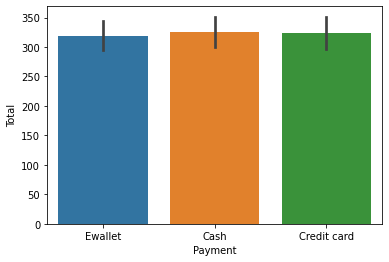

In [3]:
#creating graph to understand distribution of payment among modes of payment
import seaborn as sns
sns.barplot('Payment','Total', data=train)

<AxesSubplot:xlabel='Total', ylabel='Product line'>

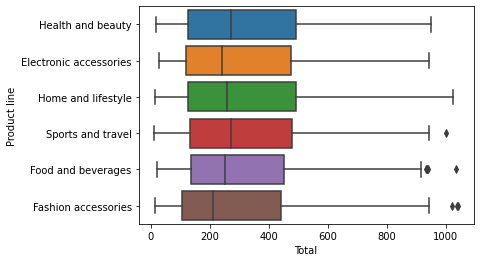

In [4]:
#creating graph to understand share of different products in the revenue
sns.boxplot(x= "Total", y = "Product line", data = train)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


<AxesSubplot:>

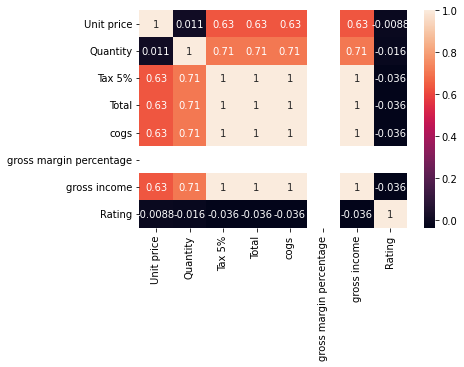

In [5]:
#checking correlation between various columns
correlation=train.corr()
correlation
sns.heatmap(correlation, annot=True)
plt.show()

/Users/namanvasudeva/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product line', ylabel='Unit price'>

<Figure size 1440x720 with 0 Axes>

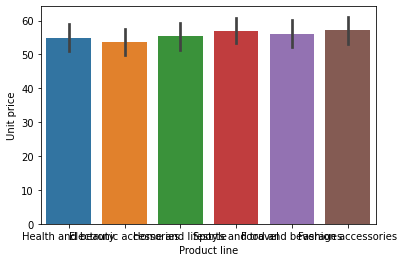

<Figure size 1440x720 with 0 Axes>

In [6]:
#creating graph to understand price comparison of products from different segments
sns.barplot('Product line','Unit price', data=train)
plt.figure(figsize = (20,10))

In [7]:
train



,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


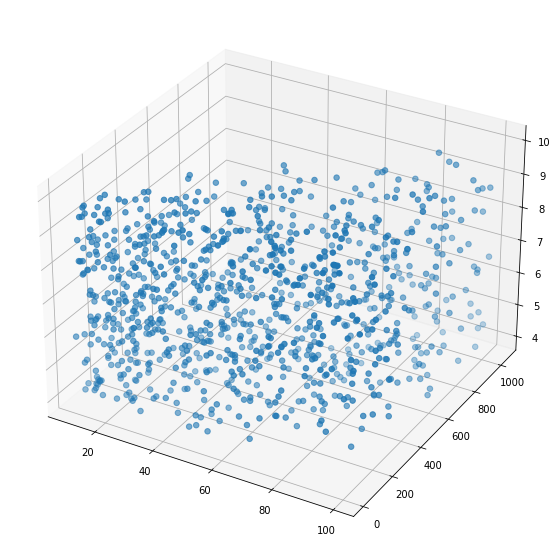

In [8]:
#creating 3D graphs to understand correlation between unit price, total, rating.
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(train['Unit price'],train['Total'],train['Rating'],s=30)
plt.show()

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='Product line', ylabel='Quantity'>

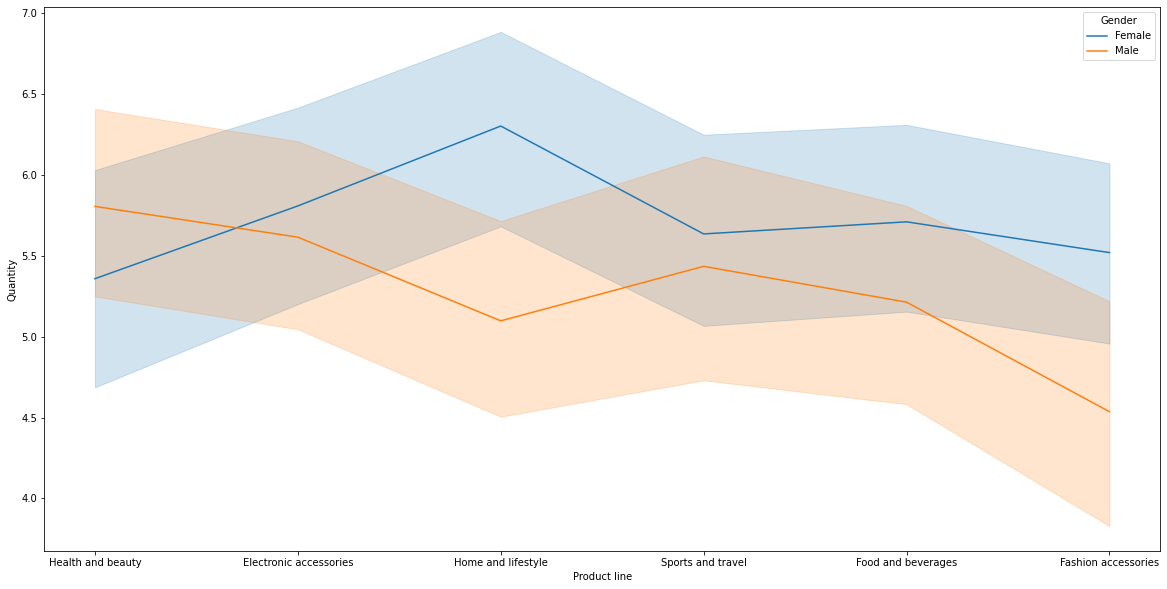

In [9]:
#creating graph to understand distribution of products from various product lines between the gender wrt to the quantity
plt.figure(figsize = (20,10))
sns.lineplot(data=train, x="Product line", y="Quantity", hue="Gender")

<Figure size 1440x720 with 0 Axes>

/Users/namanvasudeva/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='cogs'>

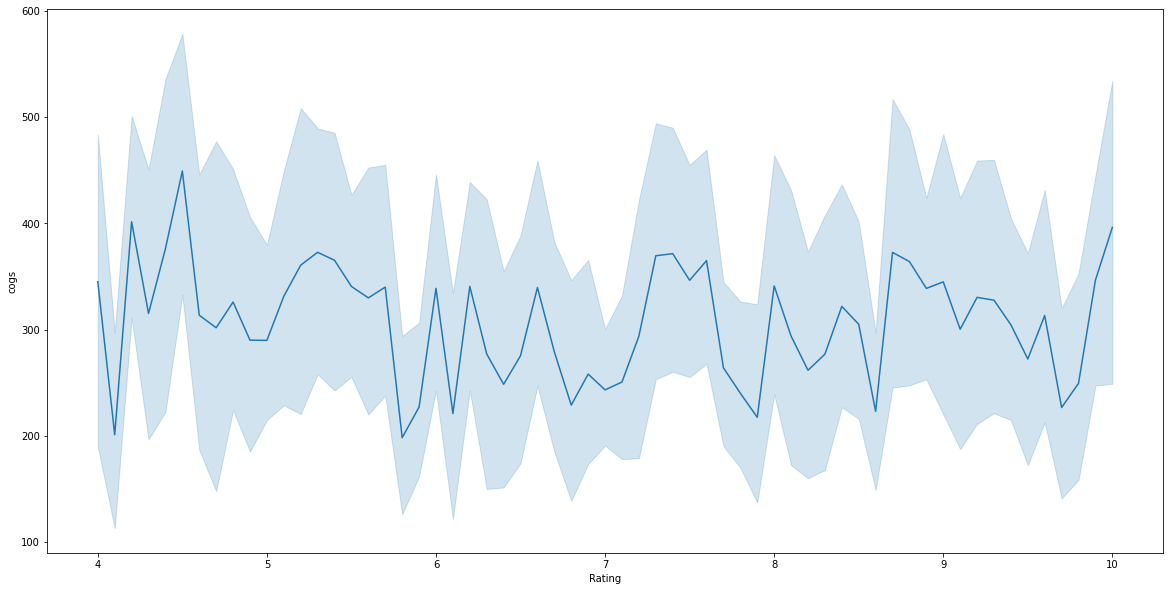

In [10]:
#creating graph to understand whether the cogs has impact on customer satisfaction
plt.figure(figsize = (20,10))
sns.lineplot("Rating", "cogs", data=train)
plt.show()

/Users/namanvasudeva/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product line', ylabel='count'>

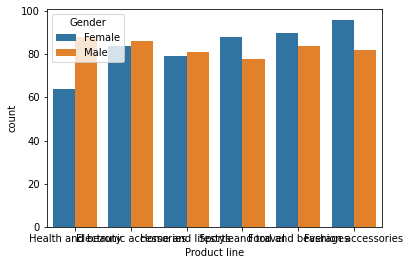

In [11]:
#creating graph to understand distribution of products among the genders
sns.countplot("Product line", hue="Gender", data=train)
plt.show()

<Figure size 1296x720 with 0 Axes>

<AxesSubplot:xlabel='cogs', ylabel='City'>

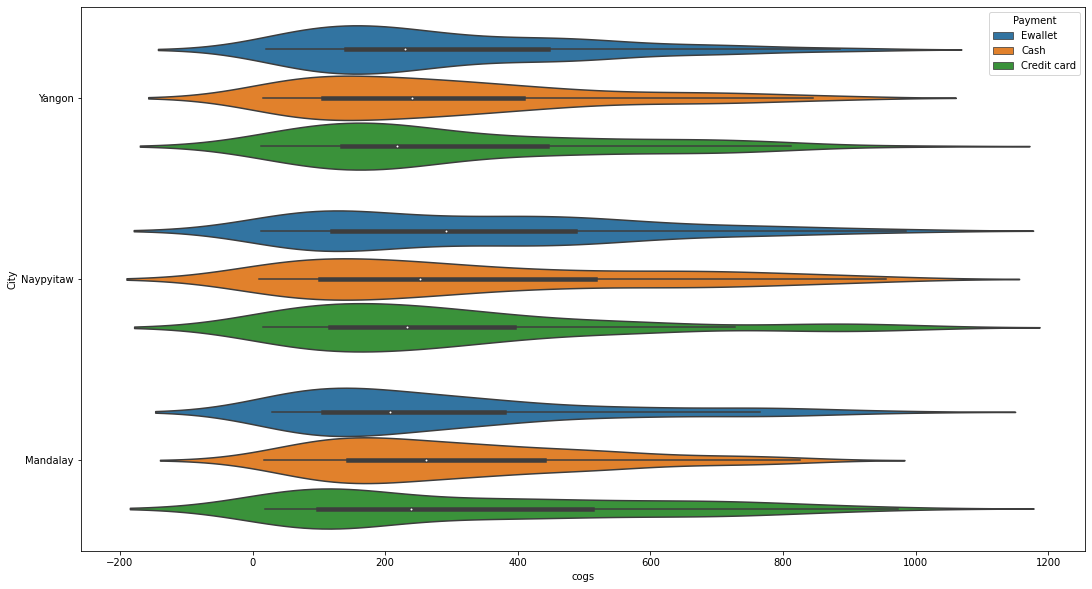

In [12]:
#creating graph to understand distribution of payment methods among various cities
plt.figure(figsize=(18,10))
sns.violinplot(x="cogs",y="City",hue='Payment',data=train)
plt.show()

In [13]:
#creating bins as dissatisfied for customers who gave rating below 5 and satisfied for customers who gave rating above 5
train['bins'] = pd.cut(x=train['Rating'], bins=[1, 5, 10],
                    labels=['Dissatisfied', 'Satisfied'])

In [14]:
train

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,bins
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Satisfied
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,Satisfied
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,Satisfied
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Satisfied
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,Satisfied
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,Dissatisfied
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,Satisfied
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,Dissatisfied


In [15]:
# 3.2 Print some information about datasets
#     In this data target is 'bins':

print("---")
print(f"train shape: {train.shape}")
print("---\n")

# 3.2.1
print(f"train Memory Usage : {sum(train.memory_usage())/10**6} MB")   # In MB
    # In MB
print("-----\n")

# 3.2.2 Missing values
print(f"Train Null columns: {train.isnull().sum().sort_values()}")

---
train shape: (1000, 18)
---

train Memory Usage : 0.137252 MB
-----

Train Null columns: Invoice ID                 0
gross income               0
gross margin percentage    0
cogs                       0
Payment                    0
Time                       0
Date                       0
Total                      0
Tax 5%                     0
Quantity                   0
Unit price                 0
Product line               0
Gender                     0
Customer type              0
City                       0
Branch                     0
Rating                     0
bins                       0
dtype: int64


In [16]:
# checking data types of various columns
train.dtypes

train.columns.values

Invoice ID                   object
Branch                       object
City                         object
Customer type                object
Gender                       object
Product line                 object
Unit price                  float64
Quantity                      int64
Tax 5%                      float64
Total                       float64
Date                         object
Time                         object
Payment                      object
cogs                        float64
gross margin percentage     float64
gross income                float64
Rating                      float64
bins                       category
dtype: object

array(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total',
       'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage',
       'gross income', 'Rating', 'bins'], dtype=object)

In [17]:
train["Product line"].values.shape

(1000,)

## Tokenization


In [18]:
raw_text = np.hstack(
                     [
                       train.City.values,
                       train.Branch.values,
                       train.Gender.values,
                       train['Product line'].values,
                       train.Payment.values
                      ]
                     )

In [19]:
tok_raw = Tokenizer()           # Create Tokenizer() object
tok_raw.fit_on_texts(raw_text)  # Just training. No transformation as yet

In [20]:
tok_raw.word_index

{'and': 1,
 'female': 2,
 'male': 3,
 'accessories': 4,
 'ewallet': 5,
 'cash': 6,
 'yangon': 7,
 'a': 8,
 'mandalay': 9,
 'b': 10,
 'naypyitaw': 11,
 'c': 12,
 'credit': 13,
 'card': 14,
 'fashion': 15,
 'food': 16,
 'beverages': 17,
 'electronic': 18,
 'sports': 19,
 'travel': 20,
 'home': 21,
 'lifestyle': 22,
 'health': 23,
 'beauty': 24}

In [21]:
MAX_TEXT_VOC = len(tok_raw.word_index)
MAX_TEXT_VOC   

24

# LABEL ENCODING


In [22]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()

le1.fit(train['Gender'])
le2.fit(train['Payment'])
le3.fit(train['Customer type'])
le4.fit(train["Product line"])
le5.fit(train['City'])
le6.fit(train['Branch'])
le7.fit(train['bins'])

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

In [23]:
train['Gender'] = le1.transform(train['Gender'].values)
train['Payment']=le2.transform(train['Payment'].values)
train['Customer type']=le3.transform(train['Customer type'].values)
train["Product line"]=le4.transform(train["Product line"].values)
train['City']=le5.transform(train['City'].values)
train['Branch']=le6.transform(train['Branch'].values)
train['bins']=le7.transform(train['bins'].values)

In [24]:

le1.classes_
len(le1.classes_)


array(['Female', 'Male'], dtype=object)

2

In [25]:
le2.classes_
len(le2.classes_)

array(['Cash', 'Credit card', 'Ewallet'], dtype=object)

3

In [26]:
le3.classes_
len(le3.classes_)

array(['Member', 'Normal'], dtype=object)

2

In [27]:
le4.classes_
len(le4.classes_)

array(['Electronic accessories', 'Fashion accessories',
       'Food and beverages', 'Health and beauty', 'Home and lifestyle',
       'Sports and travel'], dtype=object)

6

In [28]:
le5.classes_
len(le5.classes_)

array(['Mandalay', 'Naypyitaw', 'Yangon'], dtype=object)

3

In [29]:
le6.classes_
len(le6.classes_)

array(['A', 'B', 'C'], dtype=object)

3

In [30]:
le7.classes_
len(le7.classes_)

array(['Dissatisfied', 'Satisfied'], dtype=object)

2

In [31]:
# 6.8 Finally look at transformed data:

train.head(3)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,bins
0,750-67-8428,0,2,0,0,3,74.69,7,26.1415,548.9715,1/5/2019,13:08,2,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,2,1,1,0,0,15.28,5,3.8200,80.2200,3/8/2019,10:29,0,76.40,4.761905,3.8200,9.6,1
2,631-41-3108,0,2,1,1,4,46.33,7,16.2155,340.5255,3/3/2019,13:23,1,324.31,4.761905,16.2155,7.4,1


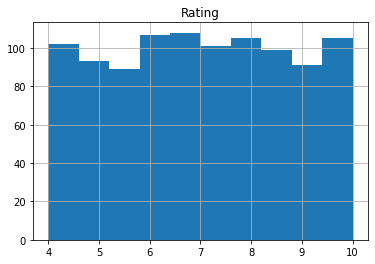

In [32]:
#Display histogram of target
pd.DataFrame(train['Rating']).hist() ;

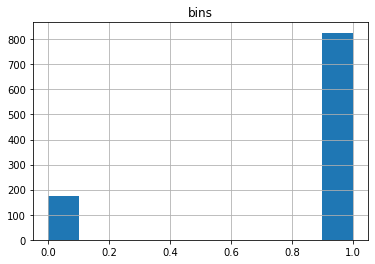

In [33]:
#  Display histogram of transformed target
pd.DataFrame(train['bins']).hist() ;

In [34]:
#Dropping Irrelevant colunms

train= train.drop(["Invoice ID","Tax 5%","Date","cogs","gross margin percentage","gross income","Rating","Time"], axis='columns')

In [35]:
train

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,bins
0,0,2,0,0,3,74.69,7,548.9715,2,1
1,2,1,1,0,0,15.28,5,80.2200,0,1
2,0,2,1,1,4,46.33,7,340.5255,1,1
3,0,2,0,1,3,58.22,8,489.0480,2,1
4,0,2,1,1,5,86.31,7,634.3785,2,1
...,...,...,...,...,...,...,...,...,...,...
995,2,1,1,1,3,40.35,1,42.3675,2,1
996,1,0,1,0,4,97.38,10,1022.4900,2,0
997,0,2,0,1,2,31.84,1,33.4320,0,1
998,0,2,1,1,4,65.82,1,69.1110,0,0


## Modeling--initial steps
>Split data<br>
>Expt with pad_sequences()<br>
>Define a function to create a dictionary of data

## Train Test Split  data

In [36]:
# 13. Split into train and test


X_train, X_valid = train_test_split(train,
                                  random_state=123,
                                  train_size=0.80   
                                 )

# 13.2
print(X_train.shape)     
print(X_valid.shape)     

(800, 10)
(200, 10)


In [37]:
# 14.1 Just have a look at the train data:
X_train.head(3)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,bins
512,0,2,1,0,1,54.28,7,398.958,2,1
685,1,0,0,0,4,49.10,2,103.110,1,1
997,0,2,0,1,2,31.84,1,33.432,0,1


In [38]:
y_train=X_train.bins
y_train.shape

(800,)

In [39]:
y_train

512    1
685    1
997    1
927    1
376    1
      ..
988    0
322    1
382    1
365    1
510    1
Name: bins, Length: 800, dtype: int64

In [40]:
X_train=X_train.drop(['bins'], axis='columns')
X_train.shape

(800, 9)

In [41]:
X_train

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment
512,0,2,1,0,1,54.28,7,398.9580,2
685,1,0,0,0,4,49.10,2,103.1100,1
997,0,2,0,1,2,31.84,1,33.4320,0
927,0,2,0,0,3,39.62,9,374.4090,1
376,1,0,0,0,4,35.38,9,334.3410,1
...,...,...,...,...,...,...,...,...,...
988,2,1,0,1,0,82.34,10,864.5700,2
322,0,2,1,1,3,15.26,6,96.1380,2
382,1,0,1,0,2,99.69,5,523.3725,0
365,2,1,1,0,1,81.68,4,343.0560,0


In [42]:
y_valid=X_valid.bins
y_valid.shape
X_valid=X_valid.drop(['bins'], axis='columns')
X_valid.shape

(200,)

(200, 9)

In [43]:
y_valid

131    1
203    1
50     1
585    1
138    1
      ..
79     1
177    0
657    1
210    1
381    0
Name: bins, Length: 200, dtype: int64

In [44]:
X_valid

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment
131,0,2,0,0,5,92.13,6,580.4190,0
203,1,0,0,1,3,25.90,10,271.9500,2
50,2,1,0,1,2,91.40,7,671.7900,0
585,0,2,1,1,3,51.71,4,217.1820,1
138,1,0,1,1,5,51.91,10,545.0550,0
...,...,...,...,...,...,...,...,...,...
79,2,1,1,0,3,20.38,5,106.9950,0
177,2,1,1,0,1,22.51,7,165.4485,1
657,0,2,0,0,1,88.15,3,277.6725,2
210,0,2,1,1,0,26.23,9,247.8735,2


## Define a function and also create a dictionary of data
That is we are sort of transforming pandas dataframe to a dictionary as per our conveience


In [45]:
# 15.1 As we want to process, different cols differently,
#      for these columns, we need as many datasets. 
#      WE have EIGHT columns or column-sets for processing.

#      Define a function that creates datasets in 
#      a dictionary format to help to feed data into keras
#      All columns but the last 'num_vars' are categorical
#      So all columns but the last begin with Embedding layer

def get_keras_data(dataset):
    X = {                                                    
        'branch_name_in':     np.array(dataset.Branch),                                          
        'city_in':     np.array(dataset.City),                                               
        'customer_type_in':     np.array(dataset['Customer type']),
        'gender_in':     np.array(dataset.Gender),
        'Product_line_in':     np.array(dataset['Product line']),
        'quantity_in':     np.array(dataset.Quantity),
        'payment_in':     np.array(dataset.Payment), 
        'num_vars_in':       np.array(dataset[["Unit price", "Total","Quantity"]])    # 3 numeric columns here 
    }
    return X

In [46]:
# 15.2 Get these datasets now:

X_train = get_keras_data(X_train)  # type: dict

In [47]:
# 15.3

X_train.keys()

dict_keys(['branch_name_in', 'city_in', 'customer_type_in', 'gender_in', 'Product_line_in', 'quantity_in', 'payment_in', 'num_vars_in'])

In [48]:
# 15.4  Observe X_train:
#        Just print two objects
#        for each data:

for key, value in X_train.items():
    print("\n\n============")
    print(key, ' : ', value[:2])



branch_name_in  :  [0 1]


city_in  :  [2 0]


customer_type_in  :  [1 0]


gender_in  :  [0 0]


Product_line_in  :  [1 4]


quantity_in  :  [7 2]


payment_in  :  [2 1]


num_vars_in  :  [[ 54.28  398.958   7.   ]
 [ 49.1   103.11    2.   ]]


In [49]:
# 16.0 Similarly get subsets 
#        for X_valid and X_test:

X_valid = get_keras_data(X_valid)

In [50]:
# 16.1 As each dict item is a numpy array,
#      we can check shapes. We need these below:

print(X_train["branch_name_in"][:4])
print("\n===========")
print(X_train["branch_name_in"].shape)

[0 1 0 0]

(800,)


### Input tensors
Recall that purpose of Input layer is to output a tensor of appropriate shape for the subsequent layers. Thus `Input()` requires input data-shape and a name (if there are more than one Input).

In [51]:
# 20.1 SEVEN Inputs. At each input specify number of input-features:

branch_name =      Input(shape=(1,),                             name="branch_name_in")   
city=Input(shape=(1,),     name="city_in")
customer_type=Input(shape=(1,),     name="customer_type_in") 
gender=Input(shape=(1,),     name="gender_in")
product_line=Input(shape=(1,),     name="Product_line_in")  
payment=Input(shape=(1,),     name="payment_in") 
num_vars =        Input(shape=(X_train["num_vars_in"].shape[1]),  name="num_vars_in")

### Embedding layer Categorical

In [52]:
# 20.2 SIX Embeddings layers.  Embedding vectors of 2 + 3, for FIVE of the above

In [53]:

emb_branch_name =           Embedding(MAX_TEXT_VOC,      3  )(branch_name)               
emb_city =      Embedding(MAX_TEXT_VOC,      3  )(city)
emb_customer_type =      Embedding(MAX_TEXT_VOC,      2  )(customer_type)
emb_gender =      Embedding(MAX_TEXT_VOC,      2  )(gender)
emb_product_line =      Embedding(MAX_TEXT_VOC,      6  )(product_line)
emb_payment =      Embedding(MAX_TEXT_VOC,      3  )(payment)


Metal device set to: Apple M1


2022-12-28 12:56:39.711167: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-28 12:56:39.711277: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Conv1D layers


We could have fed each or one of the *Embedding layer* outputs to Conv1D. But we will not do so. Left as an exercise for students. Below commented code gives an hint. You will be able to do this only if the incoming layer is large enough so that convolution operation does not reduce it to negative numbers.

In [54]:
# 23. Before we concatenate, let us see shape of 
#     each output tensor. We may have to flatten few:

print(f"emb_brand_name: {emb_branch_name.shape}")            #Flatten it
print(f"emb_category_name: {emb_city.shape}")      # Flatten it
print(f"emb_item_condition: {emb_gender.shape}")    # Flatten it
print(f"emb_item_condition: {emb_product_line.shape}")    # Flatten it
print(f"emb_item_condition: {emb_payment.shape}")    #Flatten it

emb_brand_name: (None, 1, 3)
emb_category_name: (None, 1, 3)
emb_item_condition: (None, 1, 2)
emb_item_condition: (None, 1, 6)
emb_item_condition: (None, 1, 3)


In [55]:
# 23.1 Concatenate all layer-branches:

main_l = concatenate(
                        [
                          Flatten() (emb_branch_name),
                          Flatten() (emb_city),
                          Flatten() (emb_customer_type),
                          Flatten() (emb_gender),
                          Flatten() (emb_product_line),
                          Flatten() (emb_payment),
                          num_vars          # Feed numerical variables as they are
                        ]
                      )

### Design Classification layer

In [56]:
# 24.0 Level of dropouts: 10%
dr_r = 0.1   

# 24.1 Add classification layer
main_l = Dense(128) (main_l)
main_l = Dropout(dr_r)(main_l)
main_l = Dense(64) (main_l)
main_l = Dropout(dr_r) (main_l)

In [57]:
# 24.1 Output neuron
output = Dense(1, activation="sigmoid") (main_l)

## Final Model

In [58]:
# 25 Formulate Model now
model = Model(
              inputs= [                     
                        branch_name,
                        city,
                        customer_type,
                        gender,
                        product_line,
                        payment,
                        num_vars
                       ],
              outputs= output
              )

## Compile model

In [59]:
import tensorflow.keras.losses as losses
import tensorflow.keras.metrics as metrics
from keras.optimizers import Adam

In [60]:
# 25.1
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.Accuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

## Model summary and plot

In [61]:
# 26 Formulate model and show summary    
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 branch_name_in (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 city_in (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 customer_type_in (InputLayer)  [(None, 1)]          0           []                               
                                                                                                  
 gender_in (InputLayer)         [(None, 1)]          0           []                               
                                                                                              

In [62]:
# 26.1 Plot the model architecture
#      We need graphviz and pydot to be installed
plt.figure(figsize = (14,14));
plot_model(model, to_file = "model.png");
#io.imshow("model.png");

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


<Figure size 1008x1008 with 0 Axes>

## Fit model
Takes time

In [63]:
# 26.2. Some constants
BATCH_SIZE = 10000
epochs = 8

In [64]:
# 26.3 Observe our training data once more:
#      Note that X_train is a dictionary of arrays:

for key, value in X_train.items():
    print("\n\n============")
    print(key, ' : ', value[:2])



branch_name_in  :  [0 1]


city_in  :  [2 0]


customer_type_in  :  [1 0]


gender_in  :  [0 0]


Product_line_in  :  [1 4]


quantity_in  :  [7 2]


payment_in  :  [2 1]


num_vars_in  :  [[ 54.28  398.958   7.   ]
 [ 49.1   103.11    2.   ]]


In [65]:
# 26.4
history= model.fit(X_train,
                   y_train,
                   epochs=epochs,
                   batch_size=BATCH_SIZE,
                   validation_data=(X_valid, y_valid),
                   #callbacks = callbacks,
                   verbose=1
                  )

Epoch 1/8


2022-12-28 12:56:40.118967: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/Users/namanvasudeva/miniforge3/lib/python3.9/site-packages/keras/engine/functional.py:566: UserWarning: Input dict contained keys ['quantity_in'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
2022-12-28 12:56:40.739726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 8.4144 - accuracy: 0.3800 - precision: 0.8364 - recall: 0.7511 - val_loss: 12.6790 - val_accuracy: 0.7450 - val_precision: 0.7950 - val_recall: 1.0000
Epoch 2/8
1/1 [==============================] - 0s 49ms/step - loss: 12.4242 - accuracy: 0.7138 - precision: 0.8331 - recall: 0.9880 - val_loss: 10.7622 - val_accuracy: 0.7250 - val_precision: 0.7950 - val_recall: 1.0000
Epoch 3/8


2022-12-28 12:56:42.298705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 47ms/step - loss: 10.4454 - accuracy: 0.6875 - precision: 0.8323 - recall: 0.9745 - val_loss: 6.1957 - val_accuracy: 0.6300 - val_precision: 0.7950 - val_recall: 1.0000
Epoch 4/8
1/1 [==============================] - 0s 46ms/step - loss: 7.6276 - accuracy: 0.5288 - precision: 0.8383 - recall: 0.8786 - val_loss: 2.0741 - val_accuracy: 0.1400 - val_precision: 0.7950 - val_recall: 1.0000
Epoch 5/8
1/1 [==============================] - 0s 45ms/step - loss: 10.0900 - accuracy: 0.3388 - precision: 0.8310 - recall: 0.7151 - val_loss: 1.5768 - val_accuracy: 0.1000 - val_precision: 0.7978 - val_recall: 0.9182
Epoch 6/8
1/1 [==============================] - 0s 47ms/step - loss: 11.0765 - accuracy: 0.2775 - precision: 0.8254 - recall: 0.6732 - val_loss: 3.4842 - val_accuracy: 0.4400 - val_precision: 0.7950 - val_recall: 1.0000
Epoch 7/8
1/1 [==============================] - 0s 45ms/step - loss: 7.5560 - accuracy: 0.4025 - precision: 0.8486 - recall: 0

## THE END